# 1. Importing libraries and data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [12]:
# Define path

path = r'/Users/jacob/Desktop/Achievement 6'

In [13]:
# Import the data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'deaths_cases_gender.csv'), index_col = False)

In [14]:
# 2. Data cleaning
df.columns

Index(['Unnamed: 0', 'county_code', 'county', 'state', 'lat', 'long', 'date',
       'cases', 'state_code', 'deaths', 'male', 'female', 'median_age',
       'population', 'female_percentage', 'region', 'death_rate',
       'cases_rate'],
      dtype='object')

In [15]:
df.head()

,Unnamed: 0,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region,death_rate,cases_rate
0,0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0
1,1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0
2,2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0
3,3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0
4,4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0


In [16]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
df.head()

,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region,death_rate,cases_rate
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0


### Checking extreme values for "cases"

/var/folders/5j/49cjqn4n79n3w8yw5rj_8hhh0000gn/T/ipykernel_58715/753952496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cases'], bins=25) # Shows extreme values


<Axes: xlabel='cases', ylabel='Density'>

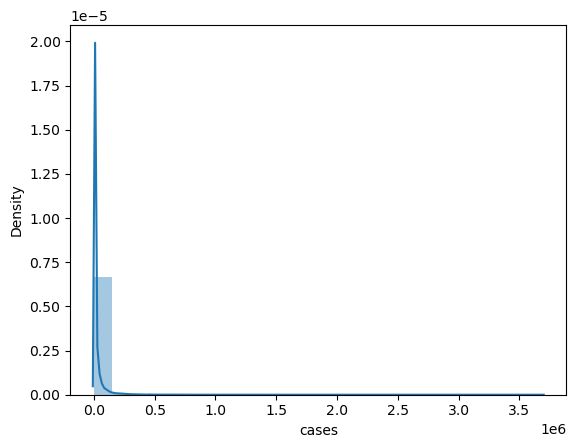

In [22]:
sns.distplot(df['cases'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [24]:
df['cases'].mean() # Check the mean

13468.40708281382

In [25]:
df['cases'].median() # Check the median

2206.0

In [26]:
df['cases'].max() # Check the max

3691301

In [27]:
# Statistical Analysis df
df.describe()

,county_code,lat,long,cases,deaths,male,female,median_age,population,female_percentage,death_rate,cases_rate
count,3.480820e+06,3.480820e+06,3.480820e+06,3.480820e+06,3.480820e+06,3.480820e+06,3.480820e+06,3.480820e+06,3.480820e+06,3.480820e+06,3.480820e+06,3.480820e+06
mean,3.139361e+04,3.796579e+01,-9.166176e+01,1.346841e+04,1.811391e+02,4.987486e+04,5.145743e+04,4.127752e+01,1.013323e+05,4.996125e+01,2.038423e-03,1.309660e-01
std,1.628955e+04,6.094254e+00,1.338664e+01,6.051912e+04,7.465527e+02,1.601408e+05,1.659431e+05,5.355930e+00,3.260458e+05,2.374558e+00,1.878266e-03,1.149205e-01
min,1.001000e+03,1.798243e+01,-1.741596e+02,0.000000e+00,0.000000e+00,3.800000e+01,3.700000e+01,2.170000e+01,7.500000e+01,2.100395e+01,0.000000e+00,0.000000e+00
25%,1.903250e+04,3.435362e+01,-9.808629e+01,3.570000e+02,4.000000e+00,5.657500e+03,5.573000e+03,3.810000e+01,1.121425e+04,4.943335e+01,2.379805e-04,2.040166e-02
50%,3.002400e+04,3.821271e+01,-8.994512e+01,2.206000e+03,3.700000e+01,1.291650e+04,1.299650e+04,4.120000e+01,2.595050e+04,5.041503e+01,1.710465e-03,1.103359e-01
75%,4.610550e+04,4.169446e+01,-8.299052e+01,7.772000e+03,1.190000e+02,3.324850e+04,3.353075e+04,4.430000e+01,6.655225e+04,5.114955e+01,3.299513e-03,2.230497e-01
max,7.215300e+04,6.931479e+01,-6.528813e+01,3.691301e+06,3.525000e+04,4.976788e+06,5.121264e+06,6.700000e+01,1.009805e+07,5.861366e+01,1.510574e-02,3.911765e+00


In [107]:
# Select cloumns 'cases' y 'deaths'
selected_columns = df[['cases']]

# Run describe() 
summary = selected_columns.describe()

# Show the Result
print(summary)

              cases
count  3.480820e+06
mean   1.346841e+04
std    6.051912e+04
min    0.000000e+00
25%    3.570000e+02
50%    2.206000e+03
75%    7.772000e+03
max    3.691301e+06


### Checking extreme values for "deaths"

/var/folders/5j/49cjqn4n79n3w8yw5rj_8hhh0000gn/T/ipykernel_58715/3238055750.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['deaths'], bins=25) # Shows extreme values


<Axes: xlabel='deaths', ylabel='Density'>

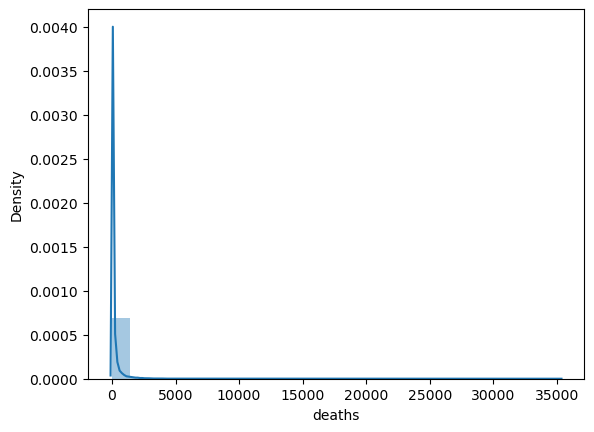

In [95]:
sns.distplot(df['deaths'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [96]:
df['deaths'].mean() # Check the mean

181.13912555087595

In [97]:
df['deaths'].median() # Check the median

37.0

In [98]:
df['deaths'].max() # Check the max

35250

In [106]:
# Select cloumns 'cases' y 'deaths'
selected_columns_2 = df[['deaths']]

# Run describe() 
summary_2 = selected_columns_2.describe()

# Show the Result
print(summary_2)

             deaths
count  3.480820e+06
mean   1.811391e+02
std    7.465527e+02
min    0.000000e+00
25%    4.000000e+00
50%    3.700000e+01
75%    1.190000e+02
max    3.525000e+04


### Checking extreme values for "population"

/var/folders/5j/49cjqn4n79n3w8yw5rj_8hhh0000gn/T/ipykernel_58715/211263016.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['population'], bins=25) # Shows extreme values


<Axes: xlabel='population', ylabel='Density'>

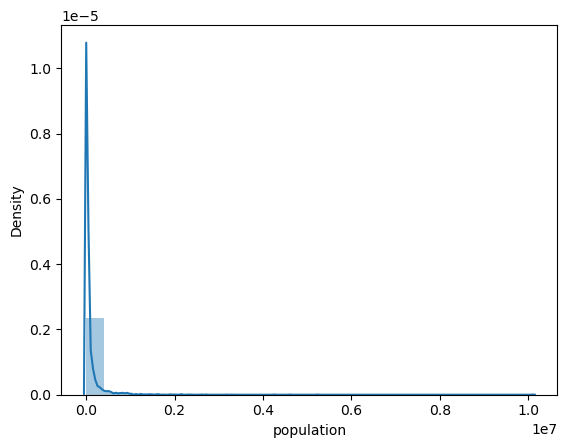

In [101]:
sns.distplot(df['population'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [102]:
df['population'].mean() # Check the mean

101332.28913043479

In [103]:
df['population'].median() # Check the median

25950.5

In [104]:
df['population'].max() # Check the max

10098052

In [105]:
# Select cloumns 'cases' y 'deaths'
selected_columns_3 = df[['population']]

# Run describe() 
summary_3 = selected_columns_3.describe()

# Show the Result
print(summary_3)

         population
count  3.480820e+06
mean   1.013323e+05
std    3.260458e+05
min    7.500000e+01
25%    1.121425e+04
50%    2.595050e+04
75%    6.655225e+04
max    1.009805e+07


# 3. Data prep for regression analysis (cases vs deaths)

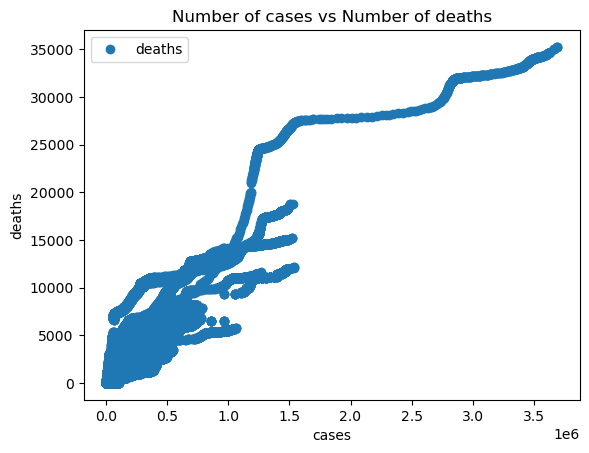

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'cases', y='deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of cases vs Number of deaths')  
plt.xlabel('cases')  
plt.ylabel('deaths')  
plt.show()

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['cases'].values.reshape(-1,1)
y = df['deaths'].values.reshape(-1,1)

In [31]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis (cases vs deaths)

In [32]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [33]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

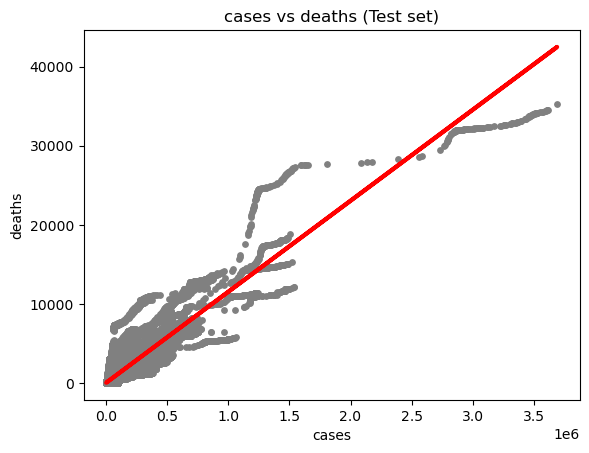

In [35]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('cases vs deaths (Test set)')
plot_test.xlabel('cases')
plot_test.ylabel('deaths')
plot_test.show()

### Hypothesis: The more cases, more deaths 

In [36]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [37]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01150706]]
Mean squared error:  71700.24213054185
R2 score:  0.8709852406019164


1. **Slope: 0.01150706**
   - The slope represents the coefficient of the 'cases' variable in the linear regression model. In this context, it suggests that for each unit increase in 'cases,' the model predicts an increase in 'deaths' by approximately 0.01150706 units. This indicates a positive relationship between 'cases' and 'deaths.'

2. **Mean Squared Error: 71700.24213054185**
   - The Mean Squared Error (MSE) measures the average squared difference between the actual 'deaths' values and the predicted 'deaths' values by the linear regression model. A lower MSE indicates a better fit of the model to the data. In this case, the MSE of approximately 71,700.24 suggests that there is some variation in the 'deaths' that is not explained by the 'cases' variable.

3. **R2 Score: 0.8709852406019164**
   - The R-squared (R2) score (coefficient of determination), measures the proportion of variance in the 'deaths' variable that can be explained by the 'cases' variable. An R2 score of 0.8709 means that approximately 87.10% of the variance in 'deaths' can be explained by the 'cases' variable according to the linear regression model. In other words, the 'cases' variable is a strong predictor of 'deaths' in the model, explaining a significant portion of the variance.

Overall, these statistics suggest that there is a positive linear relationship between 'cases' and 'deaths,' with the 'cases' variable explaining a substantial portion of the variance in 'deaths.' However, there is still some unexplained variance, as indicated by the MSE.

In [38]:
y_predicted

array([[256.00719126],
       [271.02390146],
       [ 48.66151998],
       ...,
       [104.60883413],
       [ 46.53271432],
       [ 76.37051473]])

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,227,256.007191
1,194,271.023901
2,17,48.661520
3,1,26.314814
4,278,155.182352
5,152,54.886838
6,29,43.057583
7,184,127.116639
8,1,27.177843
9,224,180.854598


### Compare how the regression fits the training set

In [40]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01150706]]
Mean squared error:  72027.67229443039
R2 score:  0.8709231156187329


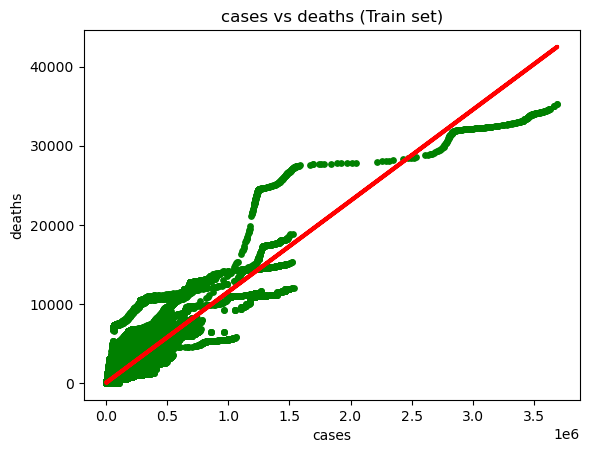

In [44]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('cases vs deaths (Train set)')
plot_test.xlabel('cases')
plot_test.ylabel('deaths')
plot_test.show()

# 3.1 Data prep for regression analysis (population vs cases)

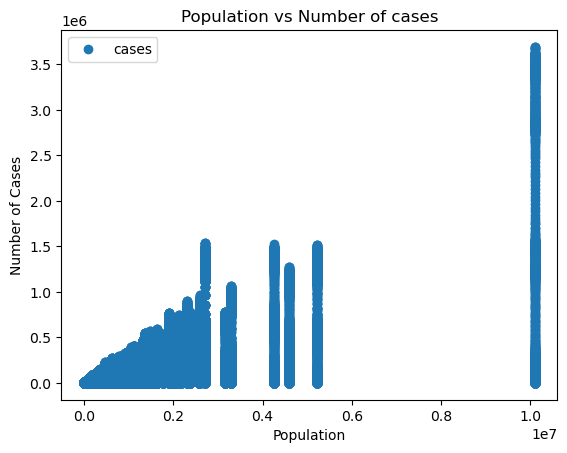

In [46]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'population', y='cases',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Population vs Number of cases')  
plt.xlabel('Population')  
plt.ylabel('Number of Cases')  
plt.show()

In [59]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_2= df['population'].values.reshape(-1,1)
y_2= df['cases'].values.reshape(-1,1)

In [61]:
# Split data into a training set and a test set.

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

# 4. Regression analysis (population vs cases)

In [50]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [62]:
# Fit the regression object onto the training set.

regression.fit(X_train_2, y_train_2)

LinearRegression()

In [63]:
# Predict the values of y using X.

y_predicted_2 = regression.predict(X_test_2)

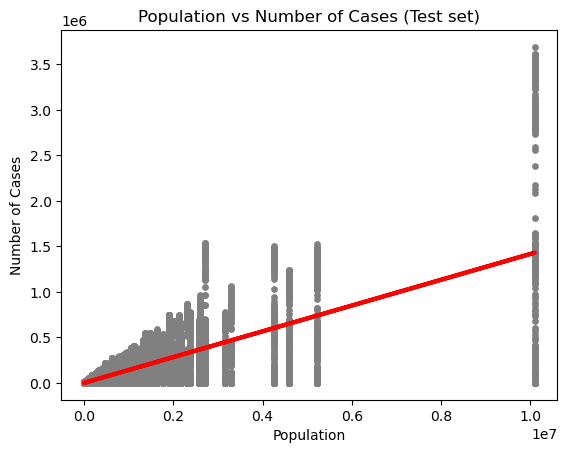

In [64]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Population vs Number of Cases (Test set)')
plot_test.xlabel('Population')
plot_test.ylabel('Number of Cases')
plot_test.show()

### Hypothesis: the bigger the population the most amount of cases (check the outlier)

In [67]:
# Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(y_test_2, y_predicted_2) # This is the mean squared error
r2_2 = r2_score(y_test_2, y_predicted_2) # This is the R2 score. 

In [69]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[0.14172404]]
Mean squared error:  1555728352.9213548
R2 score:  0.5731291317532122


1. **Slope: 0.14172404**
   - The slope represents the coefficient of the 'population' variable in the linear regression model. In this context, it suggests that for each unit increase in 'population,' the model predicts an increase in 'cases' by approximately 0.14172404 units. This indicates a positive relationship between 'population' and 'cases,' implying that as the population increases, the number of cases is also expected to increase.

2. **Mean Squared Error: 1555728352.9213548**
   - The Mean Squared Error (MSE) measures the average squared difference between the actual 'cases' values and the predicted 'cases' values by the linear regression model. A lower MSE indicates a better fit of the model to the data. In this case, the relatively high MSE of approximately 1,555,728,352.92 suggests that there is a significant amount of variation in the 'cases' variable that is not explained by the 'population' variable.

3. **R2 Score: 0.5731291317532122**
   - The R-squared (R2) score (coefficient of determination), measures the proportion of variance in the 'cases' variable that can be explained by the 'population' variable. An R2 score of 0.5731 means that approximately 57.31% of the variance in 'cases' can be explained by the 'population' variable according to the linear regression model. In other words, the 'population' variable is a predictor of 'cases,' but it does not explain all of the variance, indicating that other factors may also influence the number of cases.

Overall, these statistics suggest that there is a positive linear relationship between 'population' and 'cases,' with the 'population' variable explaining a significant portion (57.31%) of the variance in 'cases.' However, there is still a substantial amount of unexplained variance, as indicated by the relatively high MSE. This suggests that while population is a predictor of cases, there are other factors at play that influence the number of cases.

In [70]:
y_predicted_2

array([[ 8455.37726748],
       [29062.47758026],
       [ 1430.11669855],
       ...,
       [ 2847.78225173],
       [ 1294.48679408],
       [  874.41674513]])

In [71]:
# Create a dataframe comparing the actual and predicted values of y.

data_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data_2.head(30)

,Actual,Predicted
0,19972,8455.377267
1,21277,29062.477580
2,1953,1430.116699
3,11,3731.148181
4,11210,6011.062782
5,2494,3956.347678
6,1466,233.257197
7,8771,31284.710498
8,86,1986.241824
9,13441,7525.809302


### Compare how the regression fits the training set

In [72]:
# Predict.

y_predicted_train_2 = regression.predict(X_train_2) # This is predicting X_train!

In [73]:
rmse_3 = mean_squared_error(y_train_2, y_predicted_train_2)
r2_3 = r2_score(y_train_2, y_predicted_train_2)

In [74]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_3)
print('R2 score: ', r2_3)

Slope: [[0.14172404]]
Mean squared error:  1539916933.2080555
R2 score:  0.5804389663212821


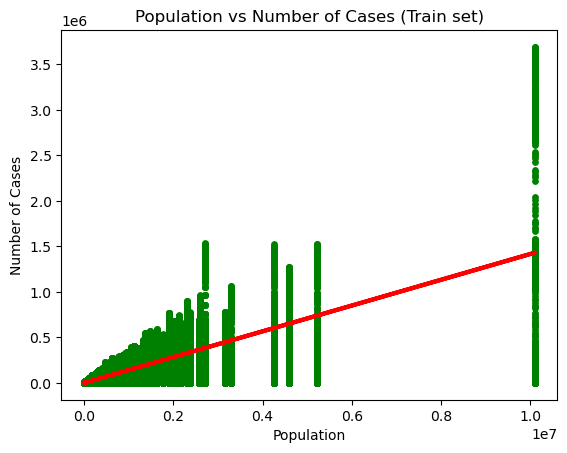

In [75]:
# Visualizing the training set results.

plot_test_2 = plt
plot_test_2.scatter(X_train_2, y_train_2, color='green', s = 15)
plot_test_2.plot(X_train_2, y_predicted_train_2, color='red', linewidth =3)
plot_test_2.title('Population vs Number of Cases (Train set)')
plot_test_2.xlabel('Population')
plot_test_2.ylabel('Number of Cases')
plot_test_2.show()

# 3.2 Data prep for regression analysis (population vs deaths)

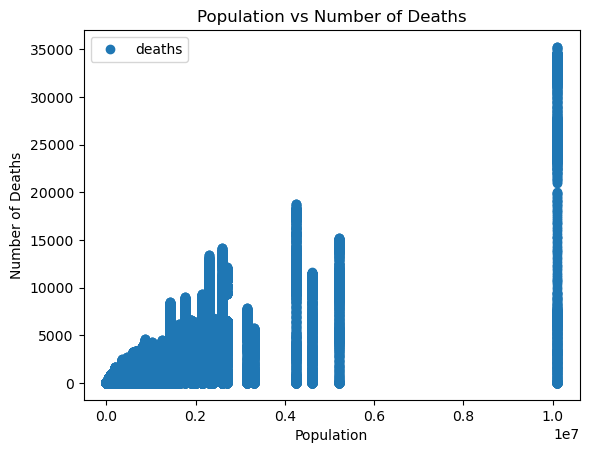

In [76]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'population', y='deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Population vs Number of Deaths')  
plt.xlabel('Population')  
plt.ylabel('Number of Deaths')  
plt.show()

In [77]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_3= df['population'].values.reshape(-1,1)
y_3= df['deaths'].values.reshape(-1,1)

In [78]:
# Split data into a training set and a test set.

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

# 4.2 Regression analysis (population vs deaths)

In [79]:
# Create a regression object.

regression_3 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [82]:
# Fit the regression object onto the training set.

regression_3.fit(X_train_3, y_train_3)

LinearRegression()

In [83]:
# Predict the values of y using X.

y_predicted_3 = regression_3.predict(X_test_3)

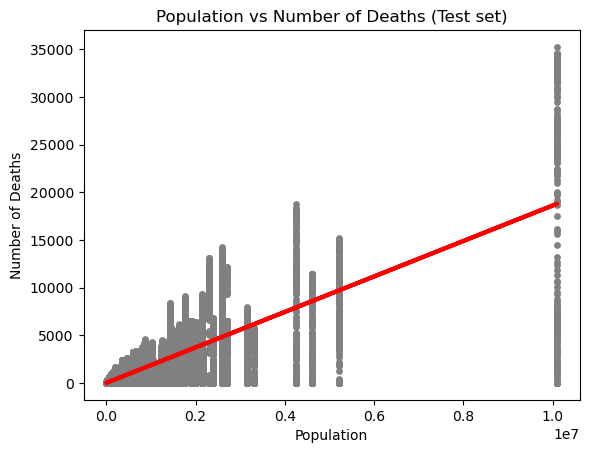

In [84]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_3 = plt
plot_test_3.scatter(X_test_3, y_test_3, color='gray', s = 15)
plot_test_3.plot(X_test_3, y_predicted_3, color='red', linewidth =3)
plot_test_3.title('Population vs Number of Deaths (Test set)')
plot_test_3.xlabel('Population')
plot_test_3.ylabel('Number of Deaths')
plot_test_3.show()

### Hypothesis: the bigger the population the most amount of deaths (check the possible outlier)

In [85]:
# Create objects that contain the model summary statistics.

rmse_3 = mean_squared_error(y_test_3, y_predicted_3) # This is the mean squared error
r2_3 = r2_score(y_test_3, y_predicted_3) # This is the R2 score. 

In [86]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_3)
print('R2 score: ', r2_3)

Slope: [[0.14172404]]
Mean squared error:  193054.92116814034
R2 score:  0.6526241269900241


1. **Slope: 0.14172404**
   - The slope represents the coefficient of the 'population' variable in the linear regression model. In this context, it suggests that for each unit increase in 'population,' the model predicts an increase in 'deaths' by approximately 0.14172404 units. This indicates a positive relationship between 'population' and 'deaths,' meaning that as the population increases, the number of deaths is also expected to increase.

2. **Mean Squared Error: 193054.92116814034**
   - The Mean Squared Error (MSE) measures the average squared difference between the actual 'deaths' values and the predicted 'deaths' values by the linear regression model. A lower MSE indicates a better fit of the model to the data. In this case, the MSE of approximately 193,054.92 suggests that there is relatively low variation in the 'deaths' variable that is not explained by the 'population' variable.

3. **R2 Score: 0.6526241269900241**
   - The R-squared (R2) score (coefficient of determination), measures the proportion of variance in the 'deaths' variable that can be explained by the 'population' variable. An R2 score of 0.6526 means that approximately 65.26% of the variance in 'deaths' can be explained by the 'population' variable according to the linear regression model. In other words, the 'population' variable is a reasonably good predictor of 'deaths,' explaining a significant portion of the variance.

Overall, these statistics suggest that there is a positive linear relationship between 'population' and 'deaths,' with the 'population' variable explaining a substantial portion (approximately 65.26%) of the variance in 'deaths.' The relatively low MSE indicates that the model provides a relatively good fit to the data, but there may still be some unexplained variation or other factors influencing the number of deaths.

In [87]:
y_predicted_3

array([[115.28213114],
       [386.01948792],
       [ 22.98382384],
       ...,
       [ 41.60920145],
       [ 21.20190978],
       [ 15.68300353]])

In [89]:
# Create a dataframe comparing the actual and predicted values of y.

data_3 = pd.DataFrame({'Actual': y_test_3.flatten(), 'Predicted': y_predicted_3.flatten()})
data_3.head(30)

,Actual,Predicted
0,227,115.282131
1,194,386.019488
2,17,22.983824
3,1,53.214918
4,278,83.168576
5,152,56.173602
6,29,7.259410
7,184,415.215321
8,1,30.290230
9,224,103.069410


### Compare how the regression fits the training set

In [91]:
# Predict.

y_predicted_train_3 = regression_3.predict(X_train_3) # This is predicting X_train!

In [92]:
rmse_4 = mean_squared_error(y_train_3, y_predicted_train_3)
r2_4 = r2_score(y_train_3, y_predicted_train_3)

In [93]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_4)
print('R2 score: ', r2_4)

Slope: [[0.14172404]]
Mean squared error:  190298.0327812254
R2 score:  0.658977218160302


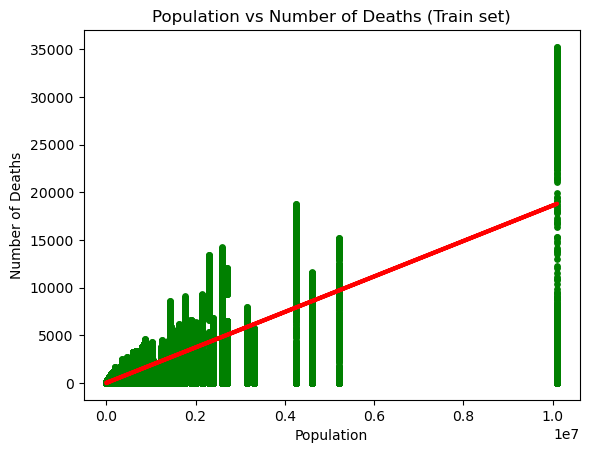

In [94]:
# Visualizing the training set results.

plot_test_4 = plt
plot_test_4.scatter(X_train_3, y_train_3, color='green', s = 15)
plot_test_4.plot(X_train_3, y_predicted_train_3, color='red', linewidth =3)
plot_test_4.title('Population vs Number of Deaths (Train set)')
plot_test_4.xlabel('Population')
plot_test_4.ylabel('Number of Deaths')
plot_test_4.show()